In [1]:
#인스타그램 로그인하기

from selenium import webdriver
driver = webdriver.Chrome(r'C:\Users\Gargantua\Desktop\files\chromedriver.exe')

In [2]:
import time
driver.get('https://www.instagram.com')
time.sleep(2)

In [3]:
email = ''
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = ''
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(3)

In [ ]:
#서칭 함수 만들기
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    return url
    
#insta_searching('제주도')#

In [2]:
#첫번째 게시물 클릭 함수 만들기

def select_first(driver):
    first = driver.find_element_by_css_selector("div._9AhH0")
    first.click()
    time.sleep(3)

#select_first(driver)


In [6]:
#게시글 정보 가져오기

import re
from bs4 import BeautifulSoup
import unicodedata

In [5]:
def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    
    
    try:
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC', content)
    except:
        content = ''
    
    
    tags = re.findall(r'#[^\s#,\\]+', content)
    
    
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    
    
    try:
        place = soup.select('div.JF9hh')[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        place = ''
    
    
    data = [content, date, place, tags]
    return data

In [7]:
#다음 게시글 열기

def move_next(driver):
    right = driver.find_element_by_css_selector('a._65Bje.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)

#move_next(driver)

In [17]:
#(통합) 여러 게시글의정보 수집하기

from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

driver = webdriver.Chrome(r'C:\Users\Gargantua\Desktop\files\chromedriver.exe')
driver.get("https://www.instagram.com/")
time.sleep(2)



email = ''
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = ""
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()

time.sleep(3)




word = '제주도맛집'
url = insta_searching(word)

driver.get(url)
time.sleep(3)


select_first(driver)



results = []


target = 500

for i in range(target):
    
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    
    except:
        time.sleep(2)
        move_next(driver)

print(results)

[['.[🌊요새 제주도에서 핵인싸 필수코스라며??🌊]애월에 핫한 랍스터 샌드위치가 떴다구 난리야~오션뷰 포토존까지 그 이유를 알겠군~(●\'◡\'●)선셋으로도 유명하고 다들 보라카이 같은 분위기라는데?랍스터 덕후 소환@@@@@@\U0001f99e장소_제주도 퀸즈블루\U0001f99e주소_제주특별자치도 제주시 애월읍 애월로1길 24-16\U0001f99e퀸즈블루??-예쁜 칵테일도 한잔 빠라삐리뽀?-해변에 자리들이 마련되어있어 노을보기 딱이다!-늦게가면 재료 소진되니 서두르자!-음악도 굉장히 힙하다고한다 ㅎㅎby. @sona_tree 님의 지난 여행이야기"제가 그네에 좀 많이 진심인데요👀(가까운 지인들은 제 그네 집착 압니다🤣)예쁜 그네 스팟에서 사진도 찍고맛있는 음식🌮과 칵테일🍹까지즐길 수 있는 곳이 있다는 소식에호다닥 달려갔다 왔습니다💙"=========================♥소중한 여행의 추억들을 공유해주세요.여행사진 및 영상제보는 "오늘의여행"페이스북 그룹 또는 "오늘의여행" 인스타 DM메세지로 제보해주세요!그럼 오늘도 즐거운여행 되세요 :)=========================#오늘의여행 #오여_제주도 #제주도가볼만한곳 #제주도여행 #제주도데이트 #제주도여행코스추천 #제주도맛집 #제주도맛집추천 #제주도카페 #제주도카페추천 #제주가볼만한곳 #제주여행 #제주데이트 #제주맛집 #제주맛집추천 #제주카페 #제주카페추천 #여행에미치다 #랍스타샌드위치 #퀸즈블루 #퀸즈블루애월 #국내여행 #국내여행추천 #커플여행 #가족여행 #여행에미치다 #여행스타그램 #여행다녀왔습니다 #travel #koreatravel', '2021-04-11', '', ['#오늘의여행', '#오여_제주도', '#제주도가볼만한곳', '#제주도여행', '#제주도데이트', '#제주도여행코스추천', '#제주도맛집', '#제주도맛집추천', '#제주도카페', '#제주도카페추천', '#제주가볼만한곳', '#제주여행', '#제주데이트', '#제주맛집', '#제주맛집추천', '#제주카페', '#제주

In [24]:
#수집한 파일 엑셀로 저장

import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content', 'data', 'place', 'tags']
results_df.to_excel(r'C:\Users\Gargantua\Desktop\files\JEJU\MatJip.xlsx', index = False)

In [25]:
#여러 엑셀파일 수집


word = '제주맛집'
url = insta_searching(word)

driver.get(url)
time.sleep(3)


select_first(driver)



results = []


target = 500

for i in range(target):
    
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    
    except:
        time.sleep(2)
        move_next(driver)

        


results_df = pd.DataFrame(results)
results_df.columns = ['content', 'data', 'place', 'tags']
results_df.to_excel(r'C:\Users\Gargantua\Desktop\files\JEJU\jejuMatJip.xlsx', index = False)




word = '제주여행'
url = insta_searching(word)

driver.get(url)


time.sleep(3)
select_first(driver)



results = []


target = 500

for i in range(target):
    
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    
    except:
        time.sleep(2)
        move_next(driver)

        


results_df = pd.DataFrame(results)
results_df.columns = ['content', 'data', 'place', 'tags']
results_df.to_excel(r'C:\Users\Gargantua\Desktop\files\JEJU\jejuYeoHang.xlsx', index = False)



word = '제주관광'
url = insta_searching(word)

driver.get(url)
time.sleep(3)


select_first(driver)



results = []


target = 500

for i in range(target):
    
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    
    except:
        time.sleep(2)
        move_next(driver)

        


results_df = pd.DataFrame(results)
results_df.columns = ['content', 'data', 'place', 'tags']
results_df.to_excel(r'C:\Users\Gargantua\Desktop\files\JEJU\jejuGwanGwang.xlsx', index = False)

In [8]:
#여러 엑셀파일 통합하기

import pandas as pd

jeju_insta_df = pd.DataFrame([])

folder = r'C:/Users/Gargantua/Desktop/files/JEJU/'
f_list = ['1_crawling_jejudoMatJip.xlsx',
         '1_crawling_jejuGwanGwang.xlsx',
         '1_crawling_jejuMatJip.xlsx',
         '1_crawling_jejuYeoHang.xlsx']

for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)
    
jeju_insta_df.columns = ['content', 'data', 'place', 'tags']

jeju_insta_df.head()

,content,data,place,tags
0,.[🌊요새 제주도에서 핵인싸 필수코스라며??🌊]애월에 핫한 랍스터 샌드위치가 떴다구...,2021-04-11,NaN,"['#오늘의여행', '#오여_제주도', '#제주도가볼만한곳', '#제주도여행', '..."
1,#제주의_흔한_풍경.jpg역시 제주도 말해뭐해 ㅠ함덕해변 너모 예뿌자나💜@ha_noll_,2021-04-12,NaN,['#제주의_흔한_풍경.jpg역시']
2,🌊 #집의기록상점보기만 해도 마음이 편안해지는 뷰 😌피운드 케이크랑 에그 타르트 꼭...,2021-04-11,귀덕리,['#집의기록상점보기만']
3,".제주4월 #핫플레이스따뜻한 봄에 가기 딱인 맛집핫플 리스트~!뷰맛집, 인생맛집 들...",2021-04-11,NaN,"['#핫플레이스따뜻한', '#선팔하면맞팔', '#선팔하면맞팔가요', '#맞팔100'..."
4,광고🖤 #제주도맛집고기 덩어리가 싹 올라간 국수 맛집으로 유명한 #산도롱맨도롱 !!...,2021-04-12,NaN,"['#제주도맛집고기', '#산도롱맨도롱', '#제주맛집', '#성산고기국수', '#..."


In [9]:
#중복데이터 제거 후 저장

jeju_insta_df.drop_duplicates(subset = ['content'], inplace = True)
jeju_insta_df.to_excel(r'C:/Users/Gargantua/Desktop/files/JEJU/1_crawling_raw.xlsx', index = False)

In [10]:
#
#워드클라우드

In [6]:
#해시태그 데이터 불러오기

import pandas as pd

raw_total = pd.read_excel(r'C:/Users/Gargantua/Desktop/files/JEJU/1_crawling_raw.xlsx')
raw_total['tags'][:3]

#특징 : 3번째글자(index=2)부터 ', ' 로 슬라이싱 가능함! 끝부분은 '] 로 끝나므로 -2까지!

0    ['#오늘의여행', '#오여_제주도', '#제주도가볼만한곳', '#제주도여행', '...
1                                 ['#제주의_흔한_풍경.jpg역시']
2                                       ['#집의기록상점보기만']
Name: tags, dtype: object

In [7]:
#해쉬태그들을 하나의 리스트로 저장하기

tags_total = []

for tags in raw_total['tags']:
    
    tags_list = tags[2:-2].split("', '")
    
    for tag in tags_list:
        if tag == '':
            pass
        else:
            tags_total.append(tag)

In [8]:
#출현빈도 집계

from collections import Counter
tags_count = Counter(tags_total)

tags_count.most_common(50)

[('#제주여행', 472),
 ('#제주도', 363),
 ('#제주맛집', 336),
 ('#제주도맛집', 324),
 ('#제주관광', 263),
 ('#제주', 239),
 ('#제주도여행', 233),
 ('#애월맛집', 101),
 ('#서귀포맛집', 89),
 ('#제주살이', 84),
 ('#여행', 84),
 ('#일상', 79),
 ('#jeju', 78),
 ('#제주카페', 77),
 ('#제주공항근처맛집', 71),
 ('#제주가볼만한곳', 62),
 ('#먹스타그램', 60),
 ('#성산일출봉맛집', 58),
 ('#제주핫플', 55),
 ('#맞팔', 53),
 ('#제주도가볼만한곳', 51),
 ('#제주맛집추천', 51),
 ('#제주도카페', 48),
 ('#좋아요', 46),
 ('#협재맛집', 43),
 ('#한림맛집', 43),
 ('#jejuisland', 43),
 ('#제주공항맛집', 42),
 ('#제주도민맛집', 41),
 ('#서귀포', 41),
 ('#소통', 40),
 ('#맛스타그램', 37),
 ('#제주도민', 37),
 ('#여행스타그램', 36),
 ('#제주시맛집', 36),
 ('#데일리', 36),
 ('#월정리맛집', 35),
 ('#맛집', 35),
 ('#제주갈치조림', 32),
 ('#선팔', 32),
 ('#애월카페', 31),
 ('#제주일상', 30),
 ('#제주라이프', 30),
 ('#daily', 30),
 ('#제주성산맛집', 29),
 ('#좋반', 29),
 ('#제주호빠', 28),
 ('#제주도호빠', 28),
 ('#선팔하면맞팔', 27),
 ('#팔로우', 27)]

In [9]:
#데이터 정제하기

STOPWORDS = ['#맞팔',
            '#좋아요',
            '#소통',
            '#데일리',
            '#선팔',
            '#좋반',
            '#제주호빠',
            '#제주도호빠',
            '#선팔하면맞팔',
            '#팔로우',
            '#좋아요반사',
            '#daily',
            '#먹팔']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)

tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주여행', 472),
 ('#제주도', 363),
 ('#제주맛집', 336),
 ('#제주도맛집', 324),
 ('#제주관광', 263),
 ('#제주', 239),
 ('#제주도여행', 233),
 ('#애월맛집', 101),
 ('#서귀포맛집', 89),
 ('#제주살이', 84),
 ('#여행', 84),
 ('#일상', 79),
 ('#jeju', 78),
 ('#제주카페', 77),
 ('#제주공항근처맛집', 71),
 ('#제주가볼만한곳', 62),
 ('#먹스타그램', 60),
 ('#성산일출봉맛집', 58),
 ('#제주핫플', 55),
 ('#제주도가볼만한곳', 51),
 ('#제주맛집추천', 51),
 ('#제주도카페', 48),
 ('#협재맛집', 43),
 ('#한림맛집', 43),
 ('#jejuisland', 43),
 ('#제주공항맛집', 42),
 ('#제주도민맛집', 41),
 ('#서귀포', 41),
 ('#맛스타그램', 37),
 ('#제주도민', 37),
 ('#여행스타그램', 36),
 ('#제주시맛집', 36),
 ('#월정리맛집', 35),
 ('#맛집', 35),
 ('#제주갈치조림', 32),
 ('#애월카페', 31),
 ('#제주일상', 30),
 ('#제주라이프', 30),
 ('#제주성산맛집', 29),
 ('#애월', 27),
 ('#제주신라호텔', 27),
 ('#제주갈치조림맛집', 26),
 ('#곽지맛집', 26),
 ('#중문맛집', 26),
 ('#제주스타그램', 26),
 ('#jejudo', 26),
 ('#제주도관광', 26),
 ('#한라산', 25),
 ('#제주시', 25),
 ('#제주통갈치구이맛집', 25)]

In [10]:
#막대차트로 해시태그 살펴보기


import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"
    
rc('font', family=font_name)

In [11]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

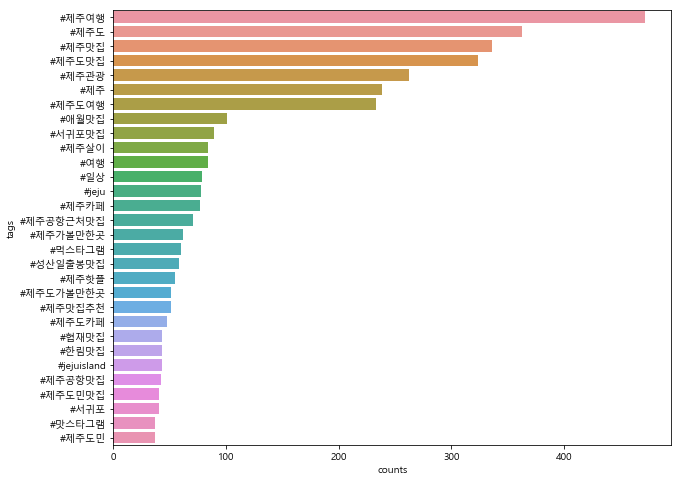

In [13]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'counts', y = 'tags', data = tag_counts_df)

In [15]:
#워드클라우드 그리기

! pip install wordcloud  #설치

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [12]:
import matplotlib.pyplot as plt

#워드클라우드는 폰트경로 직접 지정해주어야함

from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':
    font_path = r'c:/Window/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    font_path = r'/users/$USER/Library/Fonts/AppleGothic.ttf'

(-0.5, 799.5, 399.5, -0.5)

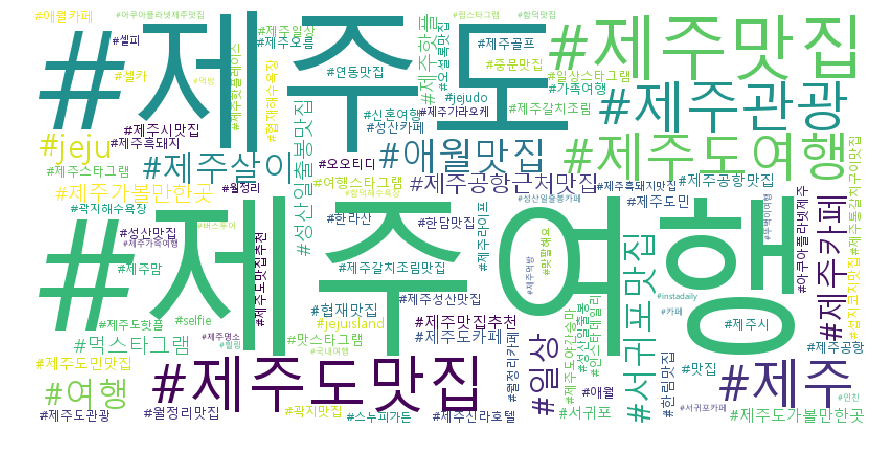

In [21]:
wordcloud = WordCloud(font_path = font_path,
                     background_color = 'white',
                     max_words = 100,
                     relative_scaling = 0.3,
                     width = 800,
                     height = 400
                     ).generate_from_frequencies(tag_counts_selected)

#max_word : 최대 몇 개의 단어를 나타낼지
#relative_scaling : 글자 간 상대적 크기(0에 가까울 수록 빈도수 순위에, 1에 가까울 수록 빈도 수에 반응)

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig(r'C:/Users/Gargantua/Desktop/files/JEJU/3_2_tag-wordcloud.png')

In [21]:
! pip install stylecloud

  Running setup.py bdist_wheel for stylecloud: started
  Running setup.py bdist_wheel for stylecloud: finished with status 'done'
  Stored in directory: C:\Users\Gargantua\AppData\Local\pip\Cache\wheels\fb\19\e2\5e95c310c5a86586048ced770f35e60a8221be7ef0138f61ca
  Running setup.py bdist_wheel for fire: started
  Running setup.py bdist_wheel for fire: finished with status 'done'
  Stored in directory: C:\Users\Gargantua\AppData\Local\pip\Cache\wheels\af\19\30\1ea0cad502dcb4e66ed5a690279628c827aea38bbbab75d5ed
  Running setup.py bdist_wheel for tinycss: started
  Running setup.py bdist_wheel for tinycss: finished with status 'done'
  Stored in directory: C:\Users\Gargantua\AppData\Local\pip\Cache\wheels\1b\26\08\7390b2e6d5eb3403ef35647f09576459ca567d00ac725307d5
  Running setup.py bdist_wheel for termcolor: started
  Running setup.py bdist_wheel for termcolor: finished with status 'done'
  Stored in directory: C:\Users\Gargantua\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f9702

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [22]:
import stylecloud



In [34]:
stylecloud.gen_stylecloud(text = tag_counts_selected,
                        icon_name = 'fas fa-dog',
                        palette="colorbrewer.diverging.Spectral_11",
                        background_color = 'black',
                        gradient = 'horizontal',
                        font_path = r'c:/Window/Fonts/malgun.ttf',
                        output_name = r'C:\Users\Gargantua\Desktop\files\test.png')

In [22]:
#지도시각화

import pandas as pd
raw_total = pd.read_excel(r'C:\Users\Gargantua\Desktop\files\JEJU\1_crawling_raw.xlsx')
raw_total.head()

,content,data,place,tags
0,.[🌊요새 제주도에서 핵인싸 필수코스라며??🌊]애월에 핫한 랍스터 샌드위치가 떴다구...,2021-04-11,NaN,"['#오늘의여행', '#오여_제주도', '#제주도가볼만한곳', '#제주도여행', '..."
1,#제주의_흔한_풍경.jpg역시 제주도 말해뭐해 ㅠ함덕해변 너모 예뿌자나💜@ha_noll_,2021-04-12,NaN,['#제주의_흔한_풍경.jpg역시']
2,🌊 #집의기록상점보기만 해도 마음이 편안해지는 뷰 😌피운드 케이크랑 에그 타르트 꼭...,2021-04-11,귀덕리,['#집의기록상점보기만']
3,".제주4월 #핫플레이스따뜻한 봄에 가기 딱인 맛집핫플 리스트~!뷰맛집, 인생맛집 들...",2021-04-11,NaN,"['#핫플레이스따뜻한', '#선팔하면맞팔', '#선팔하면맞팔가요', '#맞팔100'..."
4,광고🖤 #제주도맛집고기 덩어리가 싹 올라간 국수 맛집으로 유명한 #산도롱맨도롱 !!...,2021-04-12,NaN,"['#제주도맛집고기', '#산도롱맨도롱', '#제주맛집', '#성산고기국수', '#..."


In [23]:
#위치정보가져오기

location_counts = raw_total['place'].value_counts()
location_counts

Jeju                                      67
Jeju-do                                   47
환상의 섬 Jeju Island                         35
제주도                                       32
제주도 Jeju Island                           14
Seogwipo                                  13
제주고산리유적                                   10
아르떼뮤지엄 Arte Museum                         8
Jeju Island                                8
푸른섬 제주도                                    7
섭지코지 (Seopjikoji)                          6
제주도 애월읍                                    6
Jeju Island, South Korea - 제주도             6
제주                                         5
보롬왓                                        4
Grand Hyatt Jeju                           4
제주특별자치도                                    4
Seogwipo, Jeju Island, South Korea         4
인스밀                                        4
월정리해변                                      4
제주 협재 해수욕장                                 4
카페 노티드 제주 애월 - Cafe Knotted Jeju Aewol     4
the cliff 

In [24]:
location_counts_df = pd.DataFrame(location_counts)
location_counts_df.head()

,place
Jeju,67
Jeju-do,47
환상의 섬 Jeju Island,35
제주도,32
제주도 Jeju Island,14


In [25]:
location_counts_df.to_excel(r'C:\Users\Gargantua\Desktop\files\JEJU\3_3_location_counts.xlsx')

In [26]:
locations = list(location_counts.index)
locations

['Jeju',
 'Jeju-do',
 '환상의 섬 Jeju Island',
 '제주도',
 '제주도 Jeju Island',
 'Seogwipo',
 '제주고산리유적',
 '아르떼뮤지엄 Arte Museum',
 'Jeju Island',
 '푸른섬 제주도',
 '섭지코지 (Seopjikoji)',
 '제주도 애월읍',
 'Jeju Island, South Korea - 제주도',
 '제주',
 '보롬왓',
 'Grand Hyatt Jeju',
 '제주특별자치도',
 'Seogwipo, Jeju Island, South Korea',
 '인스밀',
 '월정리해변',
 '제주 협재 해수욕장',
 '카페 노티드 제주 애월 - Cafe Knotted Jeju Aewol',
 'the cliff jeju - 더클리프 제주',
 '고래배꼽',
 '이호테우해변',
 '스누피가든',
 '천지연폭포',
 'D&department JEJU by Arario',
 '위미 르브아',
 '소노캄 제주',
 '한라진칼국수',
 'Gongbech.공백',
 '앙앙',
 '동문시장 Dongmoon Market 東門水産市場',
 'One and only - 원앤온리 제주',
 '제주 금오름',
 '화산2020',
 '사려니숲길',
 '제주 스위스마을 - Swiss Village',
 '제주신화월드 Jeju Shinhwa World',
 '용눈이오름',
 '신창풍차해안도로',
 '퍼플모스 Purple Moss',
 '제주허브동산',
 '성산유채꽃밭',
 'Boromwat',
 '금능해수욕장',
 '금정산 북문',
 '녹산로',
 '함덕해수욕장',
 '외돌개',
 '사계바다',
 '용두암',
 '성산일출봉 Seongsan Sunrise Peak',
 '오하효',
 '제주시 연동',
 '마가리따은혜씨',
 '비밀의숲',
 '제주특별자치도 제주시 연동 바오젠거리',
 '모알보알',
 'Umu Pudding , 우무',
 'Sing Sing EAT',
 'Daejeon, South Korea',

In [53]:
#카카오 로컬 API를 활용한 장소 검색

import requests

searching = '합정 스타벅스'
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)

headers = {
    'Authorization': 'KakaoAK 93db016c2d22e816db303e2e69798c55'
}

places = requests.get(url, headers = headers).json()['documents']
places

[{'address_name': '서울 마포구 서교동 395-166',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '26572121',
  'phone': '',
  'place_name': '스타벅스 서교점',
  'place_url': 'http://place.map.kakao.com/26572121',
  'road_address_name': '서울 마포구 양화로 78',
  'x': '126.916980454434',
  'y': '37.5514601750423'},
 {'address_name': '서울 마포구 합정동 472',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '2057327896',
  'phone': '1522-3232',
  'place_name': '스타벅스 합정점',
  'place_url': 'http://place.map.kakao.com/2057327896',
  'road_address_name': '서울 마포구 월드컵로1길 14',
  'x': '126.91253700818196',
  'y': '37.54994959743763'},
 {'address_name': '서울 마포구 서교동 490',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '288597324',
  'phone': '',
  'place_name': '스타벅스 합정폴리스R

In [54]:
#장소 찾기 함수 만들기

def find_places(searching):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    
    headers ={
        "Authorization": "KakaoAK 93db016c2d22e816db303e2e69798c55"
    }
    
    places = requests.get(url, headers = headers).json()['documents']
    
    place = places[0]
    name = place['place_name']
    x=place['x']
    y=place['y']
    data = [name, x, y, searching]
    
    return data

#print(find_places('우리은행 한일타운지점'))

['우리은행 한일타운지점', '127.01138339534995', '37.304516414376714', '우리은행 한일타운지점']


In [57]:
#위치정보검색 데이터 저장

import time

locations_inform = []

for location in locations:
    try:
        data = find_places(location)
        locations_inform.append(data)
        time.sleep(0.5)
    except:
        pass
locations_inform

[['Jeju in aA', '126.83650369902168', '33.53833652360498', 'Jeju'],
 ['제주도', '126.54587355630036', '33.379777816446165', '제주도'],
 ['제주도', '126.54587355630036', '33.379777816446165', '제주도 Jeju Island'],
 ['서귀포잠수함', '126.558616052674', '33.2393033784206', 'Seogwipo'],
 ['제주고산리유적', '126.1666521275124', '33.30508436596465', '제주고산리유적'],
 ['제주도', '126.54587355630036', '33.379777816446165', 'Jeju Island'],
 ['푸른섬게스트하우스', '126.812424476454', '33.3079427982969', '푸른섬 제주도'],
 ['섭지코지', '126.930609241011', '33.4239380655993', '섭지코지 (Seopjikoji)'],
 ['올레길 17코스(광령-제주원도심 올레)', '126.439341083568', '33.4608856490895', '제주도 애월읍'],
 ['올레길 7코스(서귀포-월평 올레)', '126.51531780746991', '33.237465168471545', '제주'],
 ['보롬왓', '126.75249576943', '33.4134970849722', '보롬왓'],
 ['올레길 7코스(서귀포-월평 올레)', '126.51531780746991', '33.237465168471545', '제주특별자치도'],
 ['인스밀', '126.22923429032335', '33.23848104809581', '인스밀'],
 ['월정리해수욕장', '126.795805057888', '33.556469394054', '월정리해변'],
 ['협재해수욕장', '126.239157539085', '33.3938660776

In [58]:
locations_inform_df = pd.DataFrame(locations_inform)
locations_inform_df.columns = ['카카오위치명', '경도', '위도', '인스타위치명']
locations_inform_df.to_excel(r'C:\Users\Gargantua\Desktop\files\JEJU\3_locations.xlsx', index = False)

In [82]:
#위치검색정보와 빈도수정보 합치기

location_counts_df = pd.read_excel(r'C:\Users\Gargantua\Desktop\files\JEJU\3_3_location_counts.xlsx')
locations_inform_df = pd.read_excel(r'C:\Users\Gargantua\Desktop\files\JEJU\3_locations.xlsx')

In [83]:
location_data = pd.merge(locations_inform_df, location_counts_df,
                        how = 'inner', left_on = '카카오위치명', right_index = True)

#how='inner' : 양쪽 모두에 있는 데이터만 병합
#left_on = '카카오위치명' : 왼쪽에 위치한 df(locations_inform_df)는 '카카오위치명'을 기준으로 병합
#right_index = True : 오른쪽df(location_counts_df)는 인덱스를 기준으로 병함

location_data.head()

,카카오위치명,경도,위도,인스타위치명,place
1,제주도,126.545874,33.379778,제주도,32
2,제주도,126.545874,33.379778,제주도 Jeju Island,32
5,제주도,126.545874,33.379778,Jeju Island,32
3,서귀포잠수함,126.558616,33.239303,Seogwipo,1
345,서귀포잠수함,126.558616,33.239303,서귀포잠수함,1


In [84]:
#중복데이터 지우기

location_data['카카오위치명'].value_counts()  #중복데이터 확인

location_data = location_data.pivot_table(index = ['카카오위치명', '경도', '위도'],
                                         values = 'place',
                                         aggfunc='sum')

#카카오위치명과 경도, 위도가 같은 데이터에 대해 게시횟수를 합계로 정리함

In [85]:
location_data.head()

,,,place
카카오위치명,경도,위도,
3인칭관찰자시점,126.181200,33.349749,1
감사공묘역,126.660863,33.513005,1
검은쇠몰고오는,126.493362,33.483568,1
경일식당,126.595679,37.682315,1
고근산,126.512868,33.266766,1


In [89]:
location_data.to_excel(r'C:\Users\Gargantua\Desktop\files\JEJU\3_location_inform.xlsx', index = True)

#피봇테이블이기 때문에 True로 설정했음
## 카카오위치명, 경도, 위도는 index에 해당 / place는 value값이므로 함께 저장하기 위해서 True로 설정

In [35]:
#

In [39]:
#folium을 이용한 지도 시각화
! pip install folium

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [38]:
import pandas as pd
location_data = pd.read_excel(r'C:\Users\Gargantua\Desktop\files\JEJU\3_location_inform.xlsx')
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 4 columns):
카카오위치명    166 non-null object
경도        166 non-null float64
위도        166 non-null float64
place     166 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


In [46]:
import folium

Mt_Hanla = [33.362500, 126.533694]
map_jeju = folium.Map(location = Mt_Hanla, zoom_start = 11)  #중심점 설정

for i in range(len(location_data)):
    name = location_data['카카오위치명'][i]
    if name == '제주도':
        continue
    count = location_data['place'][i]
    size = int(count)*2
    
    long = float(location_data['위도'][i])
    lat = float(location_data['경도'][i])
    
    folium.CircleMarker((long,lat), radius = size, color = 'red', popup = name).add_to(map_jeju)

map_jeju


In [52]:
map_jeju.save(r'C:\Users\Gargantua\Desktop\files\JEJU\3_jeju.html')  #저장하기

In [59]:


#그룹화 하여 지도에 표시해보기


from folium.plugins import MarkerCluster

locations = []
names = []

for i in range(len(location_data)):
    data = location_data.iloc[i]
    locations.append((float(data['위도']), float(data['경도'])))
    names.append(data['카카오위치명'])

Mt_Hanla = [33.362500, 126.533694]
map_jeju2 = folium.Map(location = Mt_Hanla, zoom_start = 11)

marker_cluster = MarkerCluster(locations = locations,
                              popups = names,
                              name = 'Jeju',
                              overlay = True,
                              control = True,
                              )

marker_cluster.add_to(map_jeju2)
folium.LayerControl().add_to(map_jeju2)

map_jeju2

In [60]:
map_jeju2.save(r'C:\Users\Gargantua\Desktop\files\JEJU\3_jeju_cluster.html')

In [4]:


#특정 단어를 포함한 게시글 찾기



In [5]:
import pandas as pd
raw_total = pd.read_excel(r'C:\Users\Gargantua\Desktop\files\JEJU\1_crawling_raw.xlsx')

In [7]:
select_word = '해돋이'

check_list = []

for content in raw_total['content']:
    if select_word in str(content):
        check_list.append(True)
    else:
        check_list.append(False)
        
select_df = raw_total[check_list]
select_df.head()

,content,data,place,tags
1479,#지난휴가 #늦은업뎃 드디어 저녁이다! #제주여행 2일차 #성산일출봉 #세계자연유산...,2021-04-12,Seongsan Ilchulbong,"['#지난휴가', '#늦은업뎃', '#제주여행', '#성산일출봉', '#세계자연유산..."


In [8]:
for i in select_df.index:
    print(select_df.loc[i, 'content'])
    print('-'*50)

select_df.head()

#지난휴가 #늦은업뎃 드디어 저녁이다! #제주여행 2일차 #성산일출봉 #세계자연유산 #세계지질공원 #일몰맛집 #제주도가면꼭가야할곳 #제주도동쪽코스 #해돋이명소 #성산읍 #제주스타그램 #똑이착찬 #일상스타그램 #유유자적그램 #유유자적라이프 #일상소통 #군인스타그램 #슬기로운군대생활
--------------------------------------------------


,content,data,place,tags
1479,#지난휴가 #늦은업뎃 드디어 저녁이다! #제주여행 2일차 #성산일출봉 #세계자연유산...,2021-04-12,Seongsan Ilchulbong,"['#지난휴가', '#늦은업뎃', '#제주여행', '#성산일출봉', '#세계자연유산..."


In [9]:
#여러개의 단어로 각각의 단어가 있는 content 추려 파일 저장하기

In [14]:
select_word_list = ['해돋이', '박물관', '힐링', '게스트하우스', '섭지코지']

for select_word in select_word_list:
    check_list = []
    
    for content in raw_total['content']:
        if select_word in str(content):
            check_list.append(True)
        else:
            check_list.append(False)
    
    select_df = raw_total[check_list]
    
    fpath = f'C:\\Users\\Gargantua\\Desktop\\files\\JEJU\\4_select_data_{select_word}.xlsx' 
    select_df.to_excel(fpath)